In [2]:
from numpy import *
import numpy as np
import seaborn as sns; sns.set()  # for plot styling
import matplotlib.pyplot as plt

# y = mx + b
# m is slope, b is y-intercept
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))

def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [b_current, new_m, b_gradient, m_gradient]

def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    b_list = []
    m_list = []
    b_grad_list = []
    m_grad_list = []
    for i in range(num_iterations):
        b, m, b_grad, m_grad = step_gradient(b, m, array(points), learning_rate)
        b_list.append(b)
        m_list.append(m)
        b_grad_list.append(b_grad)
        m_grad_list.append(m_grad)
    return [b, m], b_list, m_list, b_grad_list, m_grad_list

def run():
    points = genfromtxt("data.csv", delimiter=",")
    learning_rate = 0.0001
    initial_b = 1 # initial y-intercept guess
    initial_m = -1 # initial slope guess
    num_iterations = 1000
    print("Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points)))
    print("Running...")
    [b, m], b_list, m_list, b_grad_list, m_grad_list = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print("After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points)))
    
    return [b, m], b_list, m_list, b_grad_list, m_grad_list

Starting gradient descent at b = 1, m = -1, error = 15184.385213123835
Running...
After 1000 iterations b = 1, m = 1.4598353283364207, error = 112.10255209691758


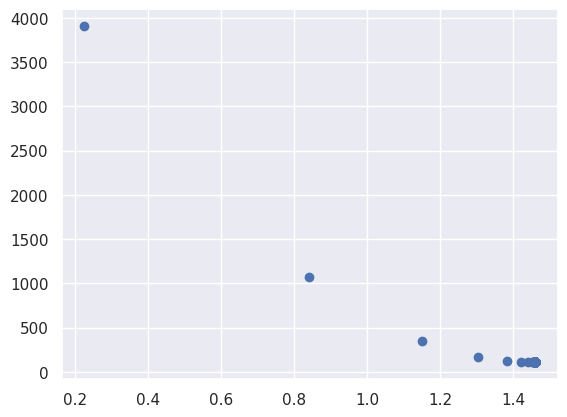

In [3]:
[b, m], b_list, m_list, b_grad_list, m_grad_list = run()
points = genfromtxt("data.csv", delimiter=",")

error_evolution = []

for i in range(len(b_list)) :
    error_evolution.append(compute_error_for_line_given_points(b_list[i], m_list[i], points))

#print(b_grad_list)


#plt.xlim([-1, 2])
#plt.ylim([100,1000])
plt.scatter(m_list, error_evolution)

[53.42680403 68.77759598]


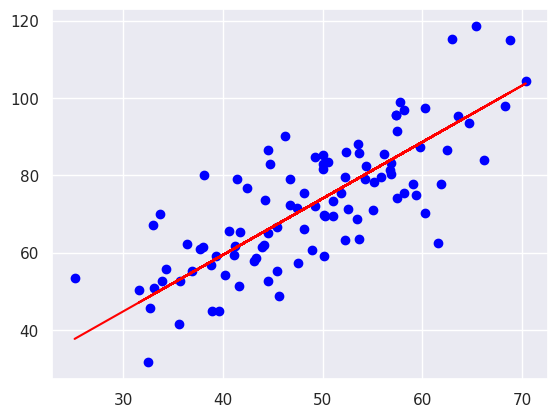

In [4]:
from matplotlib import pyplot as plt

point_test = genfromtxt("data.csv", delimiter=",")
print(point_test[1])

for i in point_test :
    plt.scatter(i[0],i[1], color='blue')

x = []
for j in point_test :
    x.append(j[0])
    
plt.plot(x, np.asarray(m)*x+b, color='red')

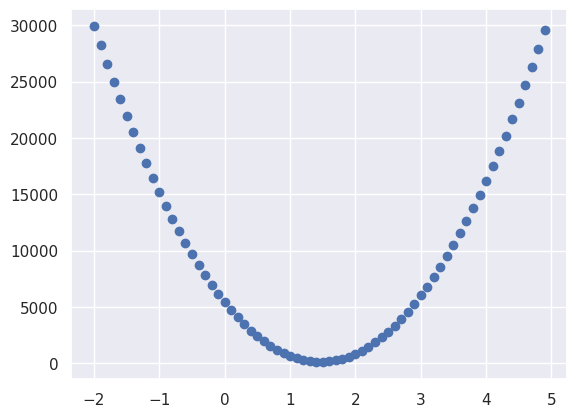

In [5]:
x = []
for j in point_test :
    x.append(j[0])

m_test = np.arange(-2,5,0.1)
b = 1

y_pred = []
for i in range(len(m_test)) :
    y_pred.append(np.asarray(m_test[i])*x +b)

error = []
for i in range(len(m_test)) : 
    error.append(compute_error_for_line_given_points(b, m_test[i], points))
    
plt.scatter(m_test, error)

(4000,)
26110.47673193204


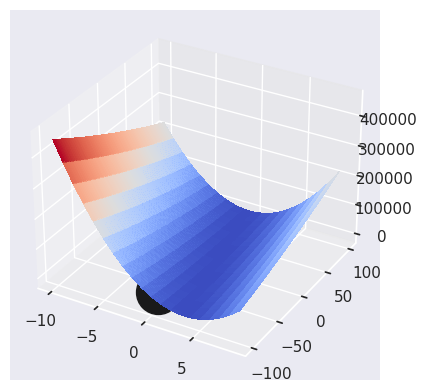

In [25]:
%matplotlib inline
from matplotlib import cm
import numpy as np
from numpy import *

def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))

points = genfromtxt("data.csv", delimiter=",")

x = []
for j in point_test :
    x.append(j[0])

m_test = np.arange(-10,10,1)
b_test = np.arange(-100,100,1)

w0, w1 = np.meshgrid(m_test, b_test)

w0 = w0.flatten()
w1 = w1.flatten()

error2d = []
for i in range(np.shape(w0.flatten())[0]) :
        error2d.append(compute_error_for_line_given_points(w1[i], w0[i], points))

print(np.shape(error2d))


fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_trisurf(w0, w1, np.array(error2d), cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.scatter(w0[250], w1[250],compute_error_for_line_given_points(w1[250], w0[250], points), marker = "o", color = "k", s=1000)

print(compute_error_for_line_given_points(w1[250], w0[250], points))
plt.show()

In [147]:
arr = np.array([1,2,3])
count = 7
print(np.shape(arr))
arr=np.stack([arr for _ in range(count)], axis=0)
print(np.shape(arr))

(3,)
(7, 3)
